In [240]:
#Importing some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [241]:
# Load the dataset
df = pd.read_csv("top_insta_influencers_data.csv")


In [242]:
#Check the first few entries
df.head()


,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [243]:
#Inspect the info of the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [244]:
#check the summary of the dataset
df.describe()

,rank,influence_score
count,200.000000,200.000000
mean,100.500000,81.820000
std,57.879185,8.878159
min,1.000000,22.000000
25%,50.750000,80.000000
50%,100.500000,84.000000
75%,150.250000,86.000000
max,200.000000,93.000000


In [245]:
df.shape

(200, 10)

In [246]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


In [247]:
print(df.drop_duplicates(inplace= True))

None


In [248]:
#Inspecting the different columns in the datset
for col in df.columns:
    unique_values=df[col].unique()
    print(f"column:{col}")
    print(f"no.of unique values:{len(unique_values)}")

column:rank
no.of unique values:200
column:channel_info
no.of unique values:200
column:influence_score
no.of unique values:32
column:posts
no.of unique values:99
column:followers
no.of unique values:165
column:avg_likes
no.of unique values:135
column:60_day_eng_rate
no.of unique values:147
column:new_post_avg_like
no.of unique values:162
column:total_likes
no.of unique values:116
column:country
no.of unique values:26


In [249]:
columns = df.columns
columns

Index(['rank', 'channel_info', 'influence_score', 'posts', 'followers',
       'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes',
       'country'],
      dtype='object')

In [250]:
df.columns = columns.str.upper()

In [251]:
df.head()

,RANK,CHANNEL_INFO,INFLUENCE_SCORE,POSTS,FOLLOWERS,AVG_LIKES,60_DAY_ENG_RATE,NEW_POST_AVG_LIKE,TOTAL_LIKES,COUNTRY
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [252]:
df.isnull().sum()

,0
RANK,0
CHANNEL_INFO,0
INFLUENCE_SCORE,0
POSTS,0
FOLLOWERS,0
AVG_LIKES,0
60_DAY_ENG_RATE,0
NEW_POST_AVG_LIKE,0
TOTAL_LIKES,0
COUNTRY,62


In [253]:
country = df["COUNTRY"].isnull().sum()/len(df)*100
print(country)

31.0


In [254]:
#calculate the most frequent country
most_frequent_country = df["COUNTRY"].mode()[0]
most_frequent_country

'United States'

In [255]:
#impute missing values with the mode
df["COUNTRY"].fillna(most_frequent_country, inplace= True)

### Converting Millions, Billions, and Thousands: Changing Object Types to Float and Integer



##### CONVERSION OF STR(K) TO THOUSANDS

In [256]:
#All the columns are in object format; we need to convert them to numeric.
columns_to_convert= ["POSTS","FOLLOWERS","AVG_LIKES",'NEW_POST_AVG_LIKE',"TOTAL_LIKES"]
def convert_number(x):
    if isinstance(x,str):
        x = x.lower().replace(',','').strip()
        if x.endswith('k'):
            return float(x[:-1])*1e3
        elif x.endswith('m'):
            return float(x[:-1])*1e6
        elif x.endswith('b'):
            return float(x[:-1])*1e9
        else:
            try:
                return float(x)
            except:
                return None
    return x
for col in columns_to_convert:
    df[col] = df[col].apply(convert_number)




In [257]:
df.head()

,RANK,CHANNEL_INFO,INFLUENCE_SCORE,POSTS,FOLLOWERS,AVG_LIKES,60_DAY_ENG_RATE,NEW_POST_AVG_LIKE,TOTAL_LIKES,COUNTRY
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39%,6500000.0,2.900000e+10,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62%,5900000.0,5.740000e+10,United States
2,3,leomessi,90,890.0,357300000.0,6800000.0,1.24%,4400000.0,6.000000e+09,United States
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97%,3300000.0,1.150000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20%,665300.0,1.250000e+10,United States


In [258]:
df["60_DAY_ENG_RATE"] = df["60_DAY_ENG_RATE"].astype(str).str.replace('%',"")
df['60_DAY_ENG_RATE'] = df['60_DAY_ENG_RATE'].replace('NaN', np.nan)
df['60_DAY_ENG_RATE'] = pd.to_numeric(df['60_DAY_ENG_RATE'],errors = 'coerce')
df['60_DAY_ENG_RATE'] = df['60_DAY_ENG_RATE'].fillna(df['60_DAY_ENG_RATE'].mean())
df['60_DAY_ENG_RATE'] = df["60_DAY_ENG_RATE"]/100



In [259]:
df.dtypes

,0
RANK,int64
CHANNEL_INFO,object
INFLUENCE_SCORE,int64
POSTS,float64
FOLLOWERS,float64
AVG_LIKES,float64
60_DAY_ENG_RATE,float64
NEW_POST_AVG_LIKE,float64
TOTAL_LIKES,float64
COUNTRY,object


#EDA ON TRAINNING DATA

##PLOT DISTRIBUTION OF NUMERICAL COLUMNS

In [260]:
df.dtypes

,0
RANK,int64
CHANNEL_INFO,object
INFLUENCE_SCORE,int64
POSTS,float64
FOLLOWERS,float64
AVG_LIKES,float64
60_DAY_ENG_RATE,float64
NEW_POST_AVG_LIKE,float64
TOTAL_LIKES,float64
COUNTRY,object


In [261]:
print(df[["INFLUENCE_SCORE","FOLLOWERS","AVG_LIKES","60_DAY_ENG_RATE","NEW_POST_AVG_LIKE","POSTS","TOTAL_LIKES"]].describe())

       INFLUENCE_SCORE     FOLLOWERS     AVG_LIKES  60_DAY_ENG_RATE  \
count       200.000000  2.000000e+02  2.000000e+02       200.000000   
mean         81.820000  7.740950e+07  1.787104e+06         0.019020   
std           8.878159  7.368727e+07  2.193359e+06         0.033213   
min          22.000000  3.280000e+07  6.510000e+04         0.000100   
25%          80.000000  4.000000e+07  5.044000e+05         0.004100   
50%          84.000000  5.005000e+07  1.100000e+06         0.008950   
75%          86.000000  6.890000e+07  2.100000e+06         0.020325   
max          93.000000  4.758000e+08  1.540000e+07         0.264100   

       NEW_POST_AVG_LIKE         POSTS   TOTAL_LIKES  
count       2.000000e+02    200.000000  2.000000e+02  
mean        1.208132e+06   3499.850000  3.658112e+09  
std         1.858322e+06   3475.828158  5.561939e+09  
min         0.000000e+00     10.000000  1.830000e+07  
25%         1.957500e+05    947.500000  9.968500e+08  
50%         5.321500e+05   210

##DISTRIBUTION OF PLOT IN MILLIONS

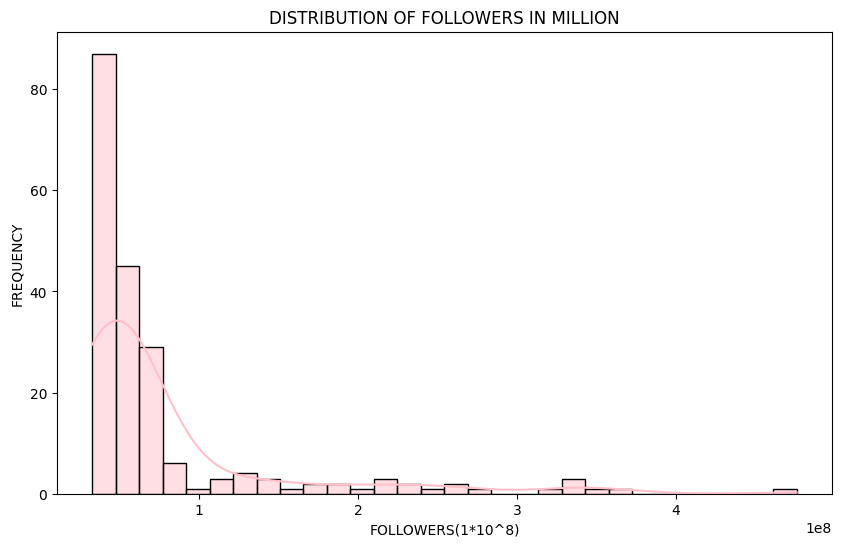

In [262]:
plt.figure(figsize=(10,6))
sns.histplot(df['FOLLOWERS'], bins = 30 , color = 'pink', kde = True)
plt.title("DISTRIBUTION OF FOLLOWERS IN MILLION")
plt.xlabel('FOLLOWERS(1*10^8)')
plt.ylabel('FREQUENCY')
plt.show()

##INFLUENCER SCORES BY CHANNEL

In [263]:
top_channels = df.sort_values(by = 'INFLUENCE_SCORE', ascending=False).head(20)

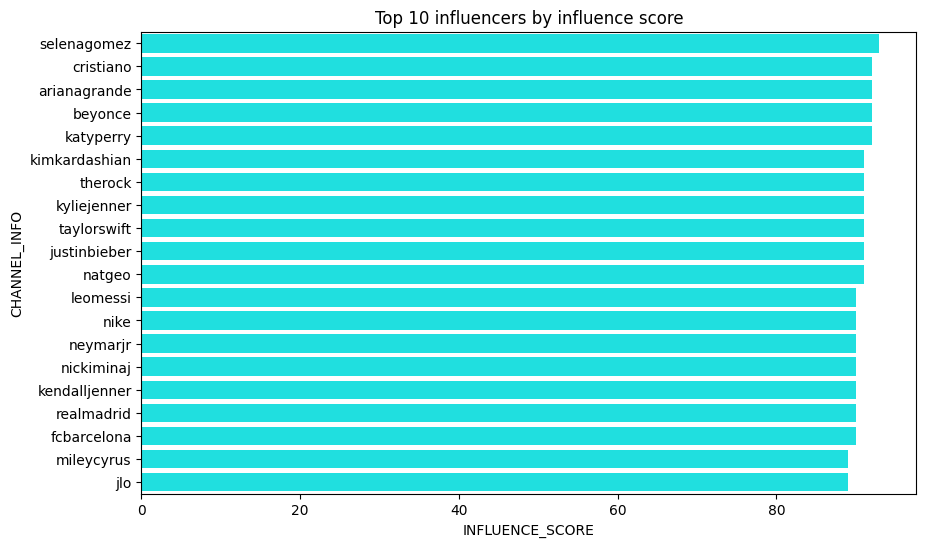

In [264]:
plt.figure(figsize=(10,6))
sns.barplot(data = top_channels, x='INFLUENCE_SCORE', y = "CHANNEL_INFO", color = 'cyan')
plt.title("Top 10 influencers by influence score")
plt.xlabel('INFLUENCE_SCORE')
plt.ylabel('CHANNEL_INFO')
plt.show()

##NUMBERS OF INFLUENCERS BY COUNTRIES

In [265]:
top_countries = df.sort_values(by = 'COUNTRY', ascending=False).head(20)


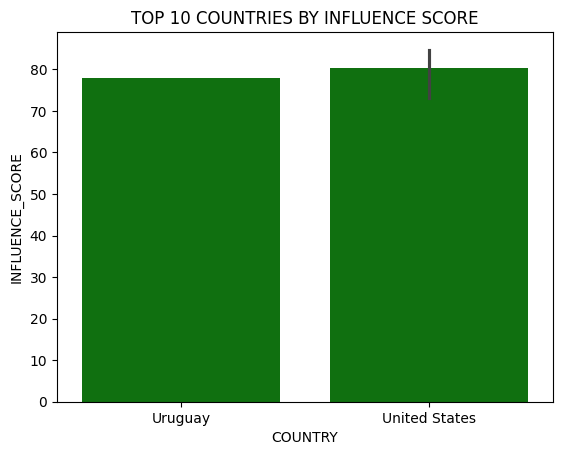

In [266]:
sns.barplot(data= top_countries , x='COUNTRY', y = 'INFLUENCE_SCORE', color = 'green')
plt.title('TOP 10 COUNTRIES BY INFLUENCE SCORE')
plt.xlabel('COUNTRY')
plt.ylabel('INFLUENCE_SCORE')
plt.show()

## SCATTERPLOT BETWEEN FOLLOWERS AND AVG_LIKES

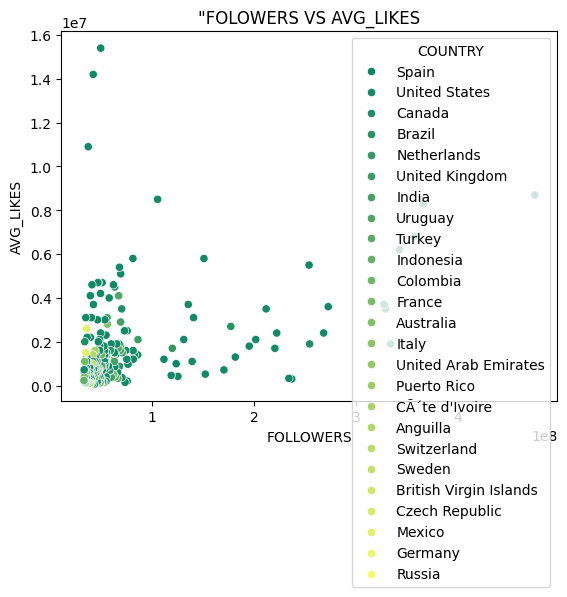

In [267]:
sns.scatterplot(x='FOLLOWERS', y = "AVG_LIKES", data = df, hue = 'COUNTRY', palette = 'summer')
plt.title('"FOLOWERS VS AVG_LIKES')
plt.xlabel('FOLLOWERS')
plt.ylabel('AVG_LIKES')
plt.show()

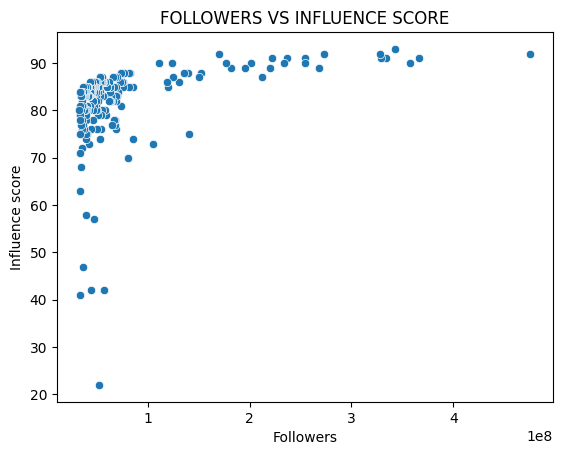

In [268]:
sns.scatterplot(x="FOLLOWERS", y = 'INFLUENCE_SCORE', data = df, palette = 'inferno')
plt.title('FOLLOWERS VS INFLUENCE SCORE')
plt.xlabel('Followers')
plt.ylabel('Influence score')
plt.show()

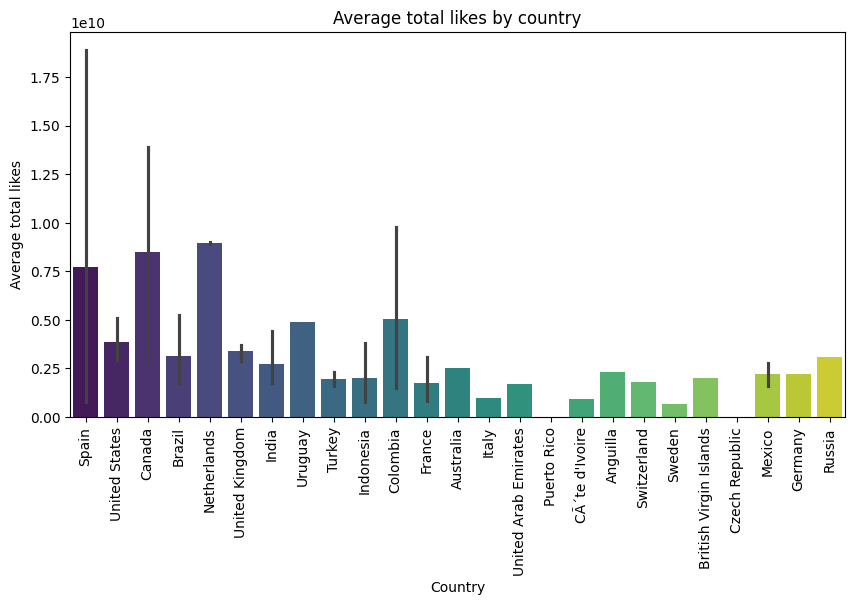

In [269]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'COUNTRY', y = 'TOTAL_LIKES', data = df, palette= 'viridis')
plt.title('Average total likes by country')
plt.xlabel('Country')
plt.ylabel('Average total likes')
plt.xticks(rotation = 90)
plt.show()

In [270]:
num_cols = df.select_dtypes(include = ['int64','float64']).columns.tolist()

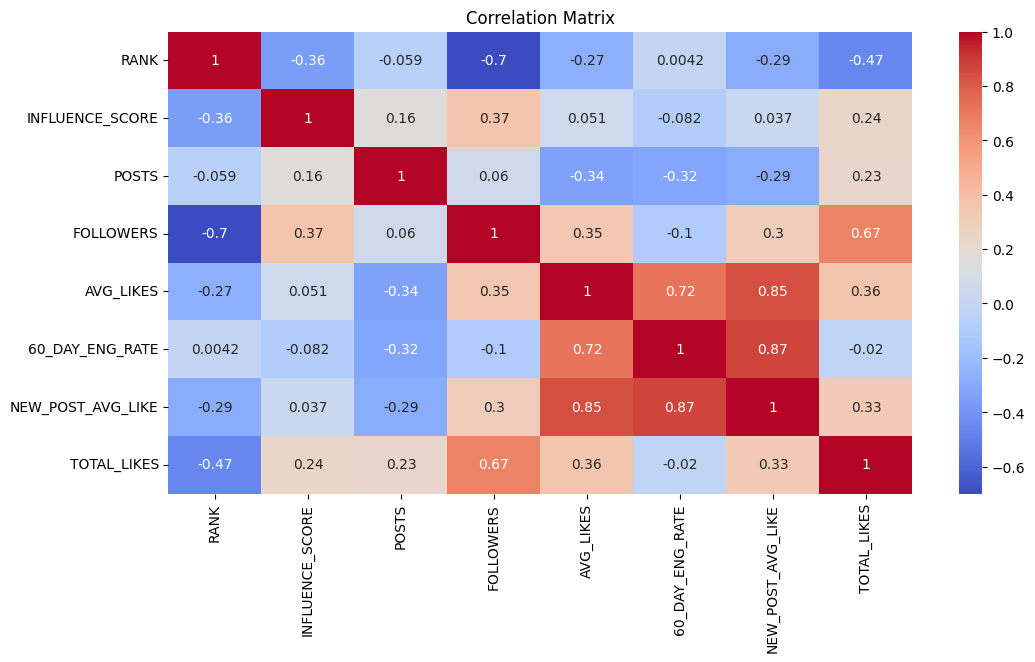

In [271]:
correlation_matrix = df[num_cols].corr()
plt.figure(figsize = (12,6))
sns.heatmap(correlation_matrix , annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [272]:
print(correlation_matrix["INFLUENCE_SCORE"].sort_values())

RANK                -0.362993
60_DAY_ENG_RATE     -0.081888
NEW_POST_AVG_LIKE    0.036548
AVG_LIKES            0.051478
POSTS                0.160068
TOTAL_LIKES          0.237675
FOLLOWERS            0.367713
INFLUENCE_SCORE      1.000000
Name: INFLUENCE_SCORE, dtype: float64


#FEATURE ENGINEERING


In [273]:
df["LIKE_FOLLOWER_RATIO"] = df["TOTAL_LIKES"]/df["FOLLOWERS"]
df["POST_FOLLOWER_RATIO"] = df["POSTS"]/df["FOLLOWERS"]
df["AVG_LIKES_RATIO"] = df["AVG_LIKES"]/df["FOLLOWERS"]

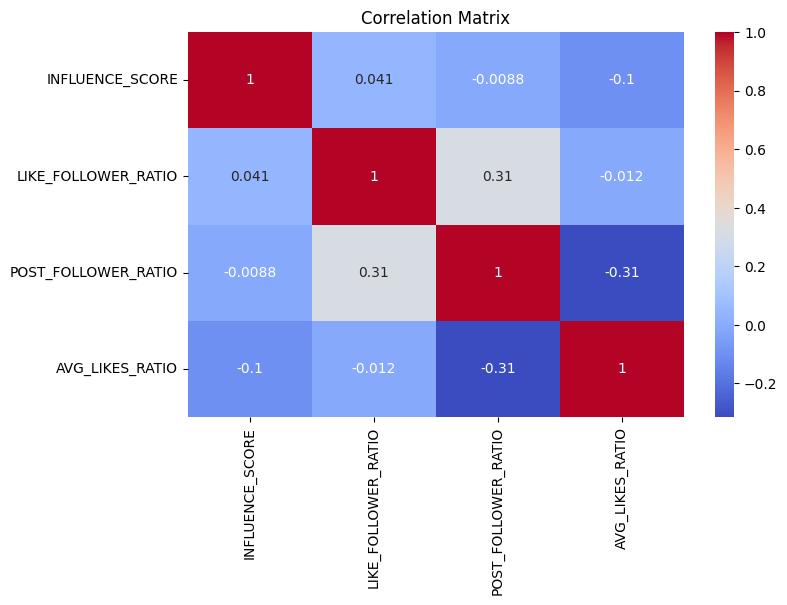

In [274]:
heatmap_data = df[['INFLUENCE_SCORE',"LIKE_FOLLOWER_RATIO", "POST_FOLLOWER_RATIO","AVG_LIKES_RATIO"]]
correlation_matrix = heatmap_data.corr()
plt.figure(figsize = (8,5))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [275]:
print(correlation_matrix["INFLUENCE_SCORE"].sort_values())

AVG_LIKES_RATIO       -0.101911
POST_FOLLOWER_RATIO   -0.008784
LIKE_FOLLOWER_RATIO    0.041004
INFLUENCE_SCORE        1.000000
Name: INFLUENCE_SCORE, dtype: float64


In [276]:
X = df[['FOLLOWERS',"AVG_LIKES","60_DAY_ENG_RATE","NEW_POST_AVG_LIKE","LIKE_FOLLOWER_RATIO","POST_FOLLOWER_RATIO"]]
y = df["INFLUENCE_SCORE"]

In [277]:
print(X.columns)

Index(['FOLLOWERS', 'AVG_LIKES', '60_DAY_ENG_RATE', 'NEW_POST_AVG_LIKE',
       'LIKE_FOLLOWER_RATIO', 'POST_FOLLOWER_RATIO'],
      dtype='object')


In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [279]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 6)
(160,)
(40, 6)
(40,)


In [280]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [281]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [282]:
print('Linear Regression:')
print('r2 Score:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

Linear Regression:
r2 Score: 0.046013068755422104
MSE: 161.28997422368874


In [283]:
model = RandomForestRegressor(n_estimators=100, random_state = 42)
model.fit(X_train_scaled, y_train)
y_pred_rf = model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test,y_pred_rf)


In [284]:
print('Random Forest:')
print('r2 Score:', r2_score(y_test, y_pred_rf))
print('MSE:', mean_squared_error(y_test, y_pred_rf))

Random Forest:
r2 Score: -0.014228493480856752
MSE: 171.47497750000002


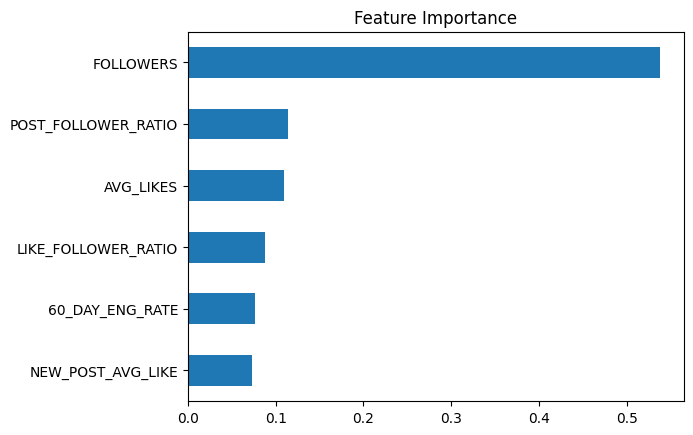

In [285]:
feature_importance = pd.Series(model.feature_importances_, index = X.columns)
feature_importance.sort_values().plot(kind = 'barh', title = 'Feature Importance')
plt.show()

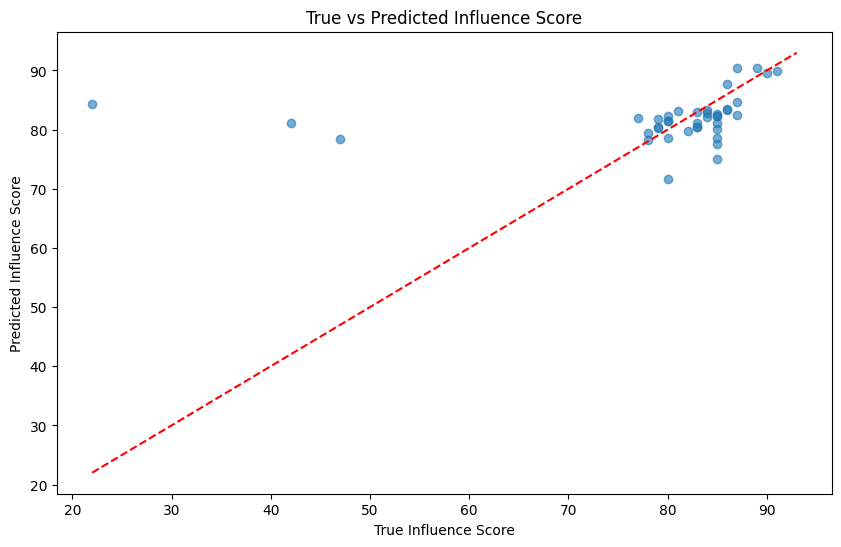

In [288]:
plt.figure(figsize = (10,6))
plt.scatter(y_test, y_pred_rf, alpha = 0.6)
plt.plot([y.min(), y.max()],[y.min(), y.max()], '--', color = 'red')
plt.xlabel('True Influence Score')
plt.ylabel("Predicted Influence Score")
plt.title('True vs Predicted Influence Score')
plt.show()